# Régression Logistique
## Importation des données 

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/h4r1c0t/WildCodeSchool/master/Odyssey/Machine%20Learning/DataBillets.csv', sep = ';')

df.replace(['VRAI', 'FAUX'], [True, False], inplace = True)

## Visualisation des donées

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [3]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [4]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


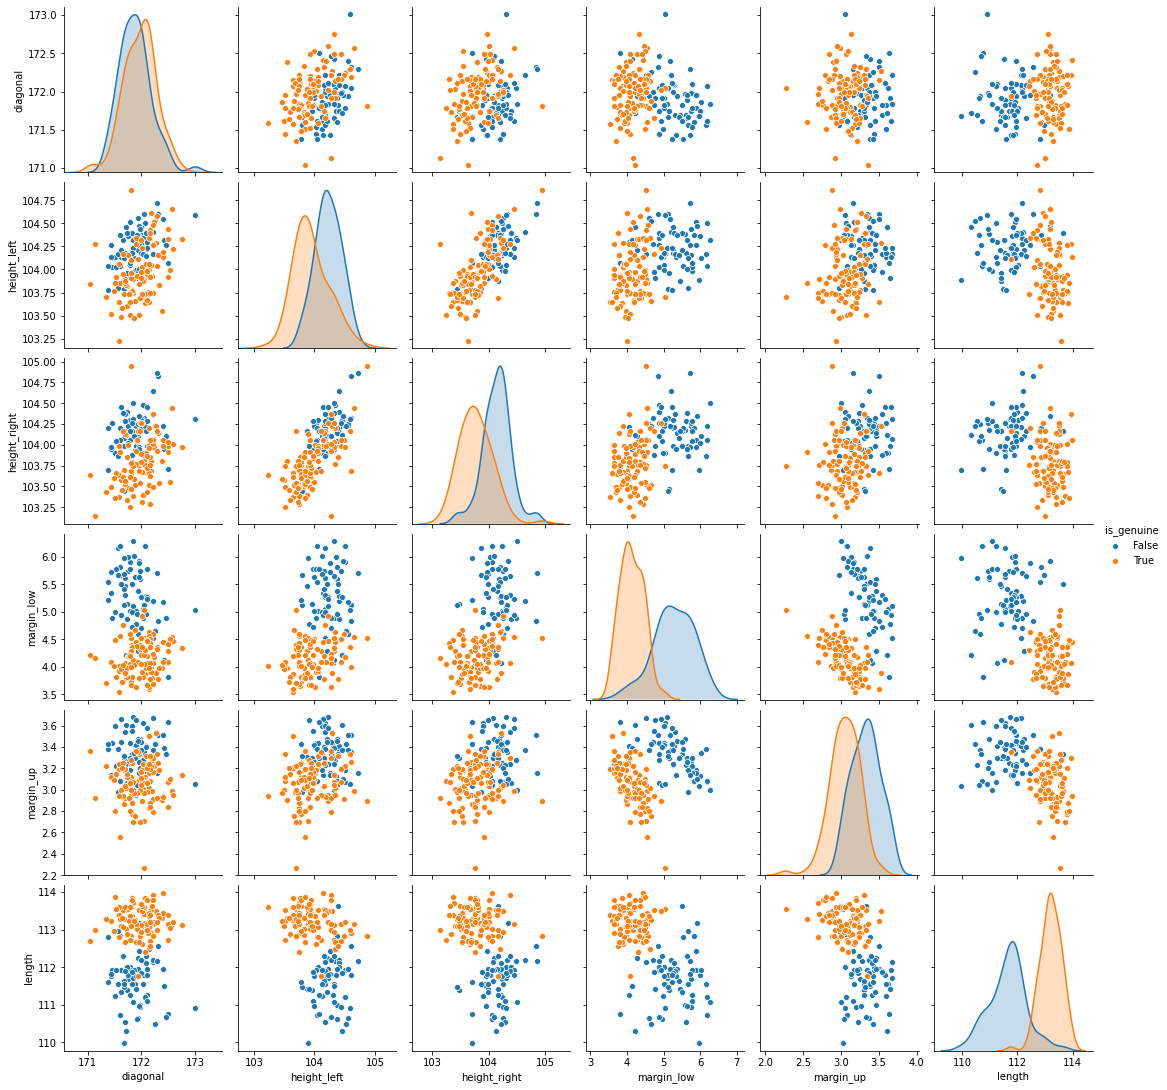

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

_ = sns.pairplot(df, hue = 'is_genuine')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


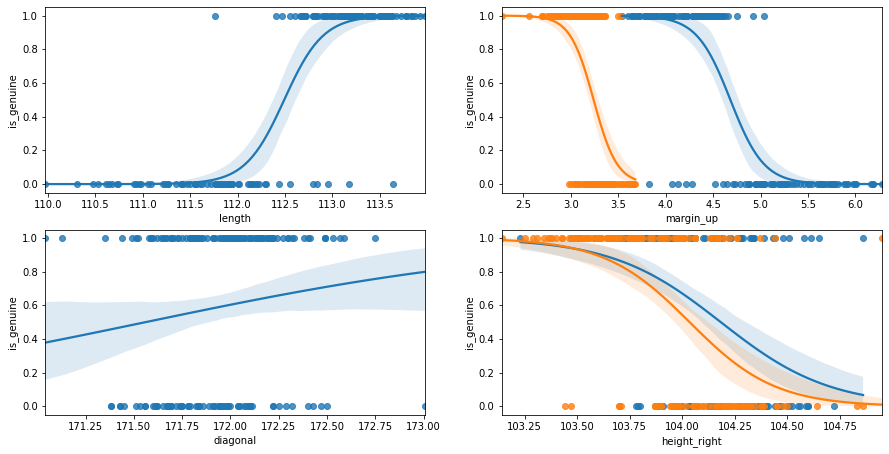

In [6]:
fig = plt.subplots(figsize = (15, 7.5))
ax1 = plt.subplot(221)
ax1 = sns.regplot('length', 'is_genuine', data = df, logistic = True)

ax2 = plt.subplot(222)
ax2 = sns.regplot('margin_low', 'is_genuine', data = df, logistic = True)
ax2 = sns.regplot('margin_up', 'is_genuine', data = df, logistic = True)

ax3 = plt.subplot(223)
ax3 = sns.regplot('diagonal', 'is_genuine', data = df, logistic = True)

ax4 = plt.subplot(224)
ax4 = sns.regplot('height_left', 'is_genuine', data = df, logistic = True)
ax4 = sns.regplot('height_right', 'is_genuine', data = df, logistic = True)
plt.show()

## Modèle de régression logistique


D'après les graphiques des régressions logistiques, on constate que la **diagonale** et la **hauteur** ne sont pas de bons indicateurs, alors que la **longueur** et les **marges** elles permettent de biens distinguer les vrais et faux billets. On peut notamment voir ça à la pente des courbes de régression. Plus la courbe est plate, moins la distinction est marquée, donc moins on distingues nos deux catégories par rapport à la variable choisie. 

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Sélection des variables
X = df[['length', 'margin_low', 'margin_up']]
y = df['is_genuine']
# Création des échantillons d'entraînement et de test:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

# Création du modèle
LogisticModel = LogisticRegression().fit(X_train, y_train)

## Scores du modèle

In [8]:
print("\nScore for the Train dataset :", LogisticModel.score(X_train, y_train))
print("Score for the Test dataset :", LogisticModel.score(X_test, y_test))


Score for the Train dataset : 0.9921259842519685
Score for the Test dataset : 0.9767441860465116
